### **2025 SDSU Data Science Symposium**

**Date of Session:** February 6, 2025

**Instructor(s):** Cameron Pykiet, Jaylin Dyson, Bishnu Sarker

**Affiliation:** Meharry Medical College School of Applied Computational Sciences, Tennessee, USA

In [4]:
pip install pypdf2 tiktoken langchain faiss-cpu langchain-community sentence-transformers langchain-ollama streamlit

In [3]:
import faiss
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.vectorstores import FAISS
from langchain_ollama.llms import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate
import os
from PyPDF2 import PdfReader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import streamlit as st



# Step 1: Setting up Vector storage

## **1. Source the Documents**
**Description:** Collect the raw documents that will be used for retrieval.

### **Tools & Methods:**
- **PDF Extraction:** `PyPDF2`, `pdfplumber` (better for scanned PDFs)
- **Web Scraping:** `BeautifulSoup`, `Scrapy`, `Selenium` (for dynamic content)
- **TXT/CSV Files:** `pandas`, `open()` (simple text extraction)
- **APIs & Databases:** `requests` (for fetching online documents), `SQLAlchemy` (for structured data retrieval)

### **Strengths & Weaknesses:**
- PDFs are structured but require **OCR tools** (`Tesseract`) for scanned documents.
- Web scraping provides **live data**, but can be blocked by websites.
- API-based sourcing is **structured and clean**, but **rate-limited** in many cases.

---

## **2. Extract the Text from the Document**
**Description:** Once the documents are sourced, extract their content into raw text.

### **Tools & Methods:**
- **PDFs:** `PyPDF2`, `pdfplumber`, `pdf2image` (for OCR conversion)
- **Scanned Documents:** `Tesseract OCR`, `easyOCR`
- **Web Content:** `BeautifulSoup` (for HTML parsing), `Newspaper3k` (for article extraction)
- **Word Docs & Excel:** `python-docx`, `pandas.read_excel()`

---

## **3. Split the Text into Manageable Chunks**
**Description:** Divide long documents into smaller segments to improve retrieval and model processing.

### **Tools & Methods:**
- **LangChain Splitters:** `RecursiveCharacterTextSplitter`, `TokenTextSplitter`
- **Sliding Windows:** Uses **chunk overlap** to maintain context between segments.
- **NLP-Based Splitters:** `NLTK` or `spaCy` for splitting by sentences/paragraphs.


### **Strengths & Weaknesses:**
- **RecursiveCharacterTextSplitter** ensures natural splits but requires **fine-tuning chunk size**.
- Token-based splitters help maintain **embedding efficiency** but can cause **context loss**.
- Sentence-based splitters work well **for structured text** but **struggle with code or tables**.

---

## **4. Convert the Text into Numbers That Computers Can Understand (Embeddings)**
**Description:** Transform text into vector representations (embeddings) so they can be searched efficiently.

### **Tools & Methods:**
- **Embedding Models:**
  - `SentenceTransformerEmbeddings` (Hugging Face Transformers)
  - `OpenAI text-embedding-ada-002`
  - `FastText` (for word embeddings, not full-text retrieval)
- **Dimensionality Reduction:** PCA, t-SNE (for visualizing embeddings)

---

## **5. Store These Number Representations for Fast Retrieval**
**Description:** Store and index the text embeddings efficiently to enable fast similarity searches.

### **Tools & Methods:**
- **FAISS (Facebook AI Similarity Search):**
  - **Strengths:** **Fast, scalable**, GPU-compatible.
  - **Weaknesses:** Requires **manual tuning** for large datasets.
- **ChromaDB:**
  - **Strengths:** **Integrated with LangChain, simple setup**.
  - **Weaknesses:** Not as optimized for large-scale retrieval as FAISS.
- **Weaviate, Pinecone:**
  - **Strengths:** **Cloud-based, scalable, real-time vector retrieval**.
  - **Weaknesses:** **API-based, can be expensive**.

### **Strengths & Weaknesses Summary:**
- **FAISS is best for local/offline use, optimized for speed**.
- **ChromaDB is easy to use with LangChain** but **limited in scalability**.
- **Pinecone and Weaviate are cloud-friendly** but **costly for large datasets**.

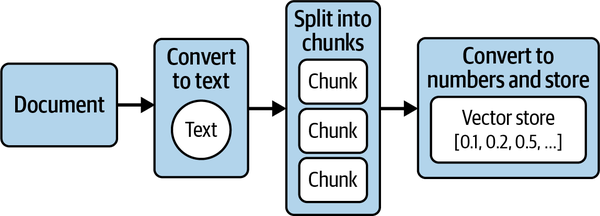

In [ ]:


class PDFDocumentProcessor:
    def __init__(self, directory_path):
        """
        Initializes the processor with the directory containing PDFs.
        """
        self.directory_path = directory_path  # Path where PDF files are stored

    def create_documents(self):
        """
        Iterates through all PDFs in the directory, extracts text from each file, 
        and stores it as a single document in a list.
        
        Returns:
            List of dictionaries where each entry contains:
            - 'file_name': Name of the PDF file
            - 'content': Full extracted text of the PDF
        """
        documents = []  # List to store full PDFs as documents

        # Iterate through all files in the directory
        for file_name in os.listdir(self.directory_path):
            if file_name.endswith(".pdf"):  # Process only PDF files
                file_path = os.path.join(self.directory_path, file_name)
                
                try:
                    # Load the PDF
                    pdf_reader = PdfReader(file_path)
                    text = ""  # Store full text for this PDF
                    
                    # Extract full text from the PDF
                    for page in pdf_reader.pages:
                        page_text = page.extract_text()
                        if page_text:
                            text += page_text + "\n"

                    # Append the full text of this PDF as a document
                    documents.append({"file_name": file_name, "content": text})

                except Exception as e:
                    print(f"Failed to load document {file_name}: {e}")

        return documents


Test directory document list:

In [ ]:
# Set directory containing PDFs
pdf_processor = PDFDocumentProcessor("/Users/jaylindyson/Library/CloudStorage/OneDrive-Personal/docs_for_rag") #<--- change to yor file path

# Extract text from all PDFs
documents = pdf_processor.create_documents()

# Example: Print the first document's file name and content
print(documents[0]["file_name"])  # Output: "example.pdf"
print(documents[0]["content"][:1000])  # Output: First 1000 characters of the extracted text


China’s DeepSeek r1, The Model Scaring Everyone _ Medium.pdf
Member-only story
China’s DeepSeek r1, The Model
Scaring Everyone… For the Wrong
Reasons
Ignacio de Gregorio·Follow
11 min read·5 days ago
1.5K 54
Markets Are Hysterically Wrong.
Open in app
Search Write
2/1/25, 7:44 PM China’s DeepSeek r1, The Model Scaring Everyone | Medium
https://medium.com/@ignacio.de.gregorio.noblejas/chinas-deepseek-r1-the-model-scaring-everyone-for-the-wrong-reasons-b8ff3c3dd45c 1/22
Source: Author using GPT-4o
The AI world has finally realized:
China is here.
And, thus, markets are literally going mental. A 40-minute report by CNBC,
NVIDIA‘s stock falling 15% and losses accounting for around a trillion in
total, and many developers closing their ChatGPT accounts for good.
Those are the effects caused by China’s newest AI model, DeepSeek’s R1, its
first reasoning model, which matches or exceeds the performance of
OpenAI’s o1 model for a fraction of a fraction of the price and with insane
2/1/25, 7:44 

In [54]:
documents

[{'file_name': 'China’s DeepSeek r1, The Model Scaring Everyone _ Medium.pdf',
  'content': "Member-only story\nChina’s DeepSeek r1, The Model\nScaring Everyone… For the Wrong\nReasons\nIgnacio de Gregorio·Follow\n11 min read·5 days ago\n1.5K 54\nMarkets Are Hysterically Wrong.\nOpen in app\nSearch Write\n2/1/25, 7:44 PM China’s DeepSeek r1, The Model Scaring Everyone | Medium\nhttps://medium.com/@ignacio.de.gregorio.noblejas/chinas-deepseek-r1-the-model-scaring-everyone-for-the-wrong-reasons-b8ff3c3dd45c 1/22\nSource: Author using GPT-4o\nThe AI world has finally realized:\nChina is here.\nAnd, thus, markets are literally going mental. A 40-minute report by CNBC,\nNVIDIA‘s stock falling 15% and losses accounting for around a trillion in\ntotal, and many developers closing their ChatGPT accounts for good.\nThose are the effects caused by China’s newest AI model, DeepSeek’s R1, its\nfirst reasoning model, which matches or exceeds the performance of\nOpenAI’s o1 model for a fraction of a

Check size of documents:

In [55]:
i =0
while i < len(documents): 
    print(len(documents[i]['content']))
    i+=1

22673
8256
18897
108774
11582
6542
11843
24653
15433
7676
56719


Split the Text into Manageable Chunks:

In [ ]:
def split_documents(documents, chunk_size=2000, chunk_overlap=1000):
    """
    Takes a list of full-text documents and splits them into smaller chunks.
    
    Args:
        documents (list): List of dictionaries containing 'file_name' and 'content'.
        chunk_size (int): Maximum size of each text chunk.
        chunk_overlap (int): Overlap between consecutive chunks for context preservation.

    Returns:
        List of dictionaries where each contains:
        - 'file_name': Name of the original PDF file
        - 'chunk': A chunk of text extracted from the document
    """
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        separators=["\n\n", "\n", " ", ""]
    )

    chunked_documents = []  # Store split chunks

    for doc in documents:
        chunks = text_splitter.split_text(doc["content"])  # Split text into smaller chunks

        for chunk in chunks:
            chunked_documents.append({"file_name": doc["file_name"], "chunk": chunk})

    return chunked_documents


Test chunks of text:

In [82]:
# Split extracted text into smaller chunks
chunked_documents = split_documents(documents)

# Print the first chunk
print(chunked_documents[0]["file_name"])  # Same file name as original PDF
print(chunked_documents[0]["chunk"])  # First text chunk


China’s DeepSeek r1, The Model Scaring Everyone _ Medium.pdf
Member-only story
China’s DeepSeek r1, The Model
Scaring Everyone… For the Wrong
Reasons
Ignacio de Gregorio·Follow
11 min read·5 days ago
1.5K 54
Markets Are Hysterically Wrong.
Open in app
Search Write
2/1/25, 7:44 PM China’s DeepSeek r1, The Model Scaring Everyone | Medium
https://medium.com/@ignacio.de.gregorio.noblejas/chinas-deepseek-r1-the-model-scaring-everyone-for-the-wrong-reasons-b8ff3c3dd45c 1/22
Source: Author using GPT-4o
The AI world has finally realized:
China is here.
And, thus, markets are literally going mental. A 40-minute report by CNBC,
NVIDIA‘s stock falling 15% and losses accounting for around a trillion in
total, and many developers closing their ChatGPT accounts for good.
Those are the effects caused by China’s newest AI model, DeepSeek’s R1, its
first reasoning model, which matches or exceeds the performance of
OpenAI’s o1 model for a fraction of a fraction of the price and with insane
2/1/25, 7:44 

Embedd text and store in a vector:

In [ ]:
def create_faiss_index(chunked_documents, model_name="all-MiniLM-L6-v2"):
    """
    Takes chunked documents, generates embeddings using SentenceTransformers, 
    and stores them in a FAISS index.

    Args:
        chunked_documents (list): List of dictionaries with 'file_name' and 'chunk'.
        model_name (str): Hugging Face embedding model to use (default: "all-MiniLM-L6-v2").
    
    Returns:
        FAISS vectorstore object.
    """
    # Load SentenceTransformer embeddings model
    embeddings = SentenceTransformerEmbeddings(model_name=model_name)

    # Extract only text chunks
    texts = [doc["chunk"] for doc in chunked_documents]

    # Convert text to vector embeddings & store in FAISS
    vector_store = FAISS.from_texts(texts, embedding=embeddings)

    return vector_store


In [ ]:
# Create FAISS index from chunked documents
faiss_index = create_faiss_index(chunked_documents)

# Save FAISS index for future use
faiss_index.save_local("faiss_index")

Test text retrieval based on a question:

In [ ]:
#load saved FAISS index for future use
retrieved_faiss = FAISS.load_local("/Users/jaylindyson/Library/CloudStorage/OneDrive-Personal/docs_for_rag/faiss_index", SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2"),allow_dangerous_deserialization=True)

# Search for the most relevant chunks
query = "How much did it cost to train the model?"
docs = retrieved_faiss.similarity_search(query, k=10)  # Retrieve top 3 matches

# Print retrieved chunks
for doc in docs:
    print(doc.page_content) 

the “deepseek-r1” on the first item on the search list.
2/1/25, 7:44 PM How To Install And Use DeepSeek R-1 In Your Local PC | by Jim Clyde Monge | Jan, 2025 | Generative AI
https://medium.com/generative-ai/how-to-install-and-use-deepseek-r-1-in-your-local-pc-b77bc20f7566 4/19
Image by Jim Clyde Monge
Click on it and down the Models section, you’ll notice that there are multiple
model sizes from 5 billion to 671 billion parameters. As a rule of thumb,
larger models require more powerful GPUs to run.
2/1/25, 7:44 PM How To Install And Use DeepSeek R-1 In Your Local PC | by Jim Clyde Monge | Jan, 2025 | Generative AI
https://medium.com/generative-ai/how-to-install-and-use-deepseek-r-1-in-your-local-pc-b77bc20f7566 5/19
Image by Jim Clyde Monge
Smaller models like the 8 billion parameter version can run on GPUs with
8GB of VRAM. Larger models need significantly more resources (refer to the
VRAM and GPU requirements section below).
To download and run the 8 billion parameter model, use the

# **RAG Pipeline: Step-by-Step Process**

## **1. Load Llama 3.2 Model**
   - Ensure the Ollama environment is set up.
   - Load `llama3.2` into memory for inference.

## **2. Retrieve Relevant Chunks Based on User Queries**
   - Perform similarity search in FAISS using the query text.
   - Retrieve the **top 10 most relevant** text chunks based on the query.

## **3. Prepare and Send the Context to Llama 3.2 in Ollama**
   - Construct a structured prompt that includes:
     - The retrieved text chunks (context).
     - The user's question.
   - Send the structured prompt to the **Ollama model (`llama3.2`)**.
   - Request a response from the model.

## **4. Generate and Return the AI Response**
   - The model processes the **retrieved context and query**.
   - Returns a **relevant and informed response** based on the best-matched text chunks.
   - Display or return the **final AI response** to the user.

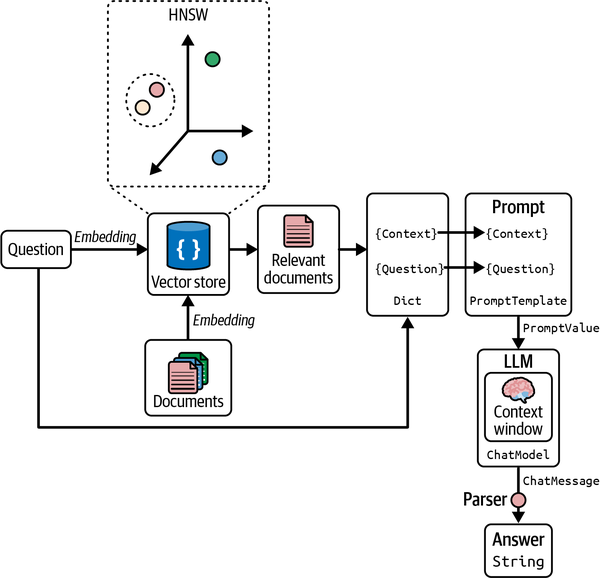

In [71]:
llm = OllamaLLM(model="llama3.2")


In [ ]:
prompt = ChatPromptTemplate.from_template("""
                                          
System Role:
You are an expert AI assistant specializing in AI research and technology. You analyze news articles and provide factual answers based only on the given documents.

Instructions:

Use only the provided document text to answer questions about DeepSeek.
Ignore unrelated text such as advertisements, web links, or generic website content.
If a question cannot be answered based on the provided documents, state that the information is unavailable rather than making assumptions.
Summarize key insights concisely while preserving technical accuracy.
If multiple perspectives or comparisons exist within the articles, present a balanced summary.
Response Format:

Response Format:

Direct Answer: Provide a clear and precise answer based on the documents.
Supporting Evidence: Reference relevant details from the articles.
Clarification (if needed): If data is conflicting or unclear, mention it. The document text
                {context}
                Question: {question}
            """)
chain = prompt | llm
response = chain.invoke({"context": docs, "question": "How does deepseek work?"})

In [78]:
response

'DeepSeek is an artificial intelligence (AI) model developed by Alibaba. According to the text, DeepSeek\'s R1 model has achieved "insane performance" on common benchmarks and is considered "god\'s work". The model works through a technique called multi-head latent attention, which boosts inference efficiency.\n\nHere are some key points about how DeepSeek works:\n\n* It uses a technique called Multi-Head Latent Attention to boost inference efficiency.\n* This involves reducing the rank of the key-value joint compression and decoupling the rotary position embedding.\n* The model also includes a distillation process, where smaller models (Qwen and Llama) are retrained using R1\'s data to imitate its responses.\n\nOverall, DeepSeek\'s R1 model is designed to be efficient and powerful, with a unique approach that sets it apart from other AI models.'

# Image of all the code put together in a single py file using streamlet as the user
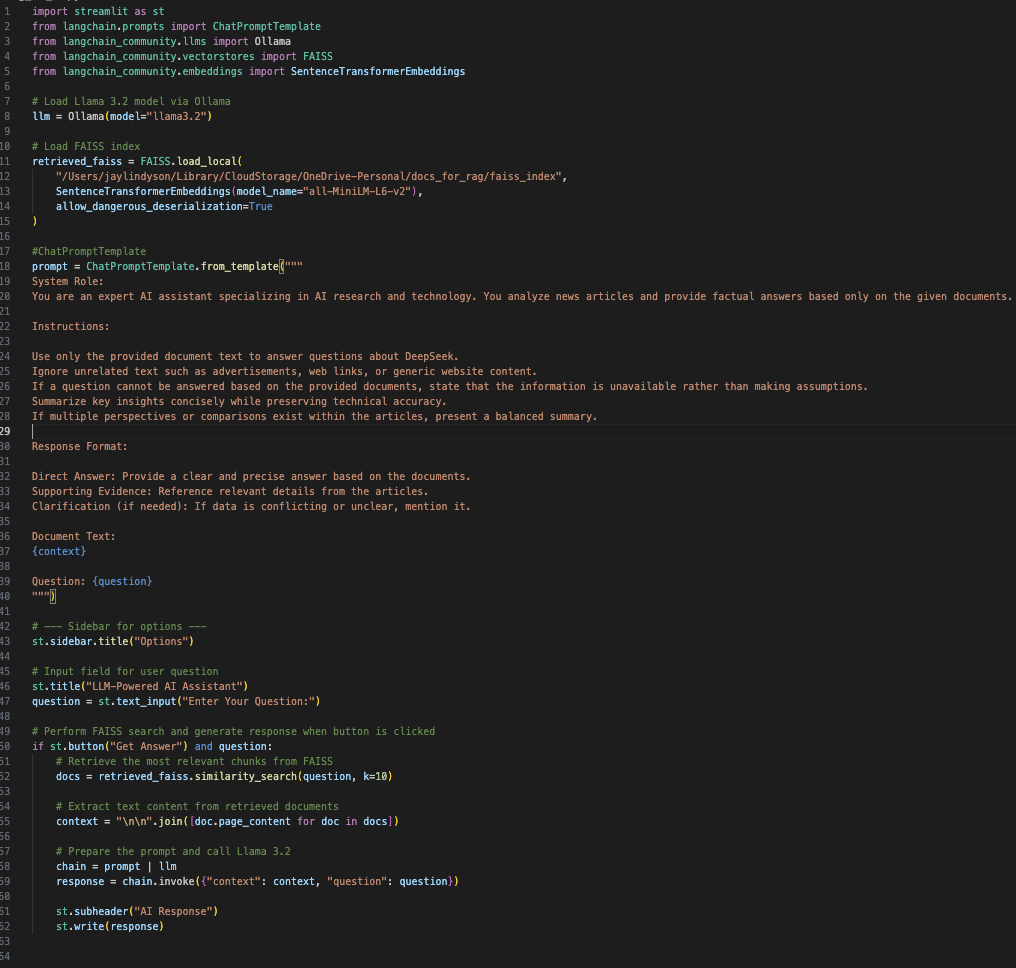

In [ ]:
!streamlit run rag_llm_sd_app.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8503
  Network URL: http://192.168.33.78:8503

/Users/jaylindyson/Library/CloudStorage/OneDrive-Personal/docs_for_rag/rag_llm_sd.py:8: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3.2")
/Users/jaylindyson/Library/CloudStorage/OneDrive-Personal/docs_for_rag/rag_llm_sd.py:13: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as